# Create a Python environment with the following modules installed by conda or pip:

In [1]:
pip install transformers torch datasets accelerate tqdm huggingface_hub bitsandbytes

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.


# Set up your computing environment with Hugging Face authorization for Llama 3.2-1B.

In [3]:
from huggingface_hub import notebook_login  
notebook_login()
!hf auth whoami 

user:  shainakumar


In [8]:
!mkdir -p outputs plots

In [9]:
!python -c "import platform, torch; print(platform.platform()); print('torch', torch.__version__); print('cuda', torch.cuda.is_available()); print('mps', hasattr(torch.backends,'mps') and torch.backends.mps.is_available())" \
| tee outputs/env_info.txt


macOS-15.6-arm64-arm-64bit
torch 2.5.1
cuda False
mps True


# Verify that your setup is working by running llama_mmlu_eval.py which runs the model on two MMLU topics.  

In [16]:
!script -q outputs/baseline_mps_noquant.txt /usr/bin/time -p python llama_mmlu_eval.py


Llama 3.2-1B MMLU Evaluation (Quantized)

Environment Check
✓ Running locally (not in Colab)
✓ Platform: Darwin (arm64)
✓ Processor: arm
✓ Apple Metal (MPS) Available
✓ Using Metal Performance Shaders for GPU acceleration
✓ Quantization disabled - loading full precision model
✓ Hugging Face authenticated

Configuration
Model: meta-llama/Llama-3.2-1B-Instruct
Device: mps
Quantization: None (full precision)
Expected memory: ~2.5 GB (FP16)
Number of subjects: 2


Loading model meta-llama/Llama-3.2-1B-Instruct...
Device: mps
✓ Tokenizer loaded
Loading model (this may take 2-3 minutes)...
✓ Model loaded successfully!
  Model device: mps:0
  Model dtype: torch.float16
  Running on Apple Metal (MPS)

Starting evaluation on 2 subjects


Progress: 1/2 subjects

Evaluating subject: astronomy
Testing astronomy: 100%|██████████████████████| 152/152 [01:42<00:00,  1.48it/s]
✓ Result: 76/152 correct = 50.00%

Progress: 2/2 subjects

Evaluating subject: business_ethics
Testing business_ethics: 100%|

# Time the code using the time shell command line function. 

Compare the timings for the following setups:

Using GPU and no quantization.

Using GPU and 4-bit quantization. (Not possible on a MacBook, skip if that is your laptop.)

Using GPU and 8-bit quantization. (Not possible on a MacBook, skip if that is your laptop.)

Using CPU and no quantization.

Using CPU and 4-bit quantization.

In [1]:
!cp llama_mmlu_eval.py eval_mps_noquant.py
!cp llama_mmlu_eval.py eval_cpu_noquant.py
!mkdir -p outputs
!ls


Topic1LLMs.ipynb
eval_cpu_noquant.py
eval_mps_noquant.py
llama_3.2_1b_mmlu_results_full_20260131_212449.json
llama_3.2_1b_mmlu_results_full_20260131_213254.json
llama_mmlu_eval.py
outputs
plots


In [18]:
!script -q outputs/timing_mps_noquant.txt /usr/bin/time -p python eval_mps_noquant.py


Llama 3.2-1B MMLU Evaluation (Quantized)

Environment Check
✓ Running locally (not in Colab)
✓ Platform: Darwin (arm64)
✓ Processor: arm
✓ Apple Metal (MPS) Available
✓ Using Metal Performance Shaders for GPU acceleration
✓ Quantization disabled - loading full precision model
✓ Hugging Face authenticated

Configuration
Model: meta-llama/Llama-3.2-1B-Instruct
Device: mps
Quantization: None (full precision)
Expected memory: ~2.5 GB (FP16)
Number of subjects: 2


Loading model meta-llama/Llama-3.2-1B-Instruct...
Device: mps
✓ Tokenizer loaded
Loading model (this may take 2-3 minutes)...
✓ Model loaded successfully!
  Model device: mps:0
  Model dtype: torch.float16
  Running on Apple Metal (MPS)

Starting evaluation on 2 subjects


Progress: 1/2 subjects

Evaluating subject: astronomy
Testing astronomy: 100%|██████████████████████| 152/152 [01:29<00:00,  1.70it/s]
✓ Result: 76/152 correct = 50.00%

Progress: 2/2 subjects

Evaluating subject: business_ethics
Testing business_ethics: 100%|

In [4]:
!git status --untracked-files=all


On branch main
Your branch is up to date with 'origin/main'.

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	Topic1LLMs.ipynb
	eval_cpu_noquant.py
	eval_mps_noquant.py
	llama_3.2_1b_mmlu_results_full_20260131_212449.json
	llama_3.2_1b_mmlu_results_full_20260131_213254.json
	llama_mmlu_eval.py
	outputs/baseline_mps_noquant.txt
	outputs/env_info.txt
	outputs/timing_cpu_noquant.txt
	outputs/timing_mps_noquant.txt

nothing added to commit but untracked files present (use "git add" to track)


In [6]:
!git add .
!git status

On branch main
Your branch is up to date with 'origin/main'.

Changes to be committed:
  (use "git restore --staged <file>..." to unstage)
	new file:   Topic1LLMs.ipynb
	new file:   eval_cpu_noquant.py
	new file:   eval_mps_noquant.py
	new file:   llama_3.2_1b_mmlu_results_full_20260131_212449.json
	new file:   llama_3.2_1b_mmlu_results_full_20260131_213254.json
	new file:   llama_mmlu_eval.py
	new file:   outputs/baseline_mps_noquant.txt
	new file:   outputs/env_info.txt
	new file:   outputs/timing_cpu_noquant.txt
	new file:   outputs/timing_mps_noquant.txt



In [7]:
!git commit -m "baseline timings and setup"


[main ecd4657] baseline timings and setup
 10 files changed, 2415 insertions(+)
 create mode 100644 Running_an_LLM/Topic1LLMs.ipynb
 create mode 100644 Running_an_LLM/eval_cpu_noquant.py
 create mode 100644 Running_an_LLM/eval_mps_noquant.py
 create mode 100644 Running_an_LLM/llama_3.2_1b_mmlu_results_full_20260131_212449.json
 create mode 100644 Running_an_LLM/llama_3.2_1b_mmlu_results_full_20260131_213254.json
 create mode 100644 Running_an_LLM/llama_mmlu_eval.py
 create mode 100644 Running_an_LLM/outputs/baseline_mps_noquant.txt
 create mode 100644 Running_an_LLM/outputs/env_info.txt
 create mode 100644 Running_an_LLM/outputs/timing_cpu_noquant.txt
 create mode 100644 Running_an_LLM/outputs/timing_mps_noquant.txt


In [8]:
!git push

Enumerating objects: 14, done.
Counting objects: 100% (14/14), done.
Delta compression using up to 8 threads
Compressing objects: 100% (13/13), done.
Writing objects: 100% (13/13), 22.30 KiB | 7.43 MiB/s, done.
Total 13 (delta 3), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (3/3), done.
To https://github.com/shainakumar/cs6501workshop.git
   12116bb..ecd4657  main -> main


In [9]:
!script -q outputs/timing_cpu_noquant.txt /usr/bin/time -p python eval_cpu_noquant.py

python(17766) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.



Llama 3.2-1B MMLU Evaluation (Quantized)

Environment Check
✓ Running locally (not in Colab)
✓ Platform: Darwin (arm64)
✓ Processor: arm
⚠️  No GPU detected - running on CPU
✓ Quantization disabled - loading full precision model
✓ Hugging Face authenticated

Configuration
Model: meta-llama/Llama-3.2-1B-Instruct
Device: cpu
Quantization: None (full precision)
Expected memory: ~5 GB (FP32)
Number of subjects: 2


Loading model meta-llama/Llama-3.2-1B-Instruct...
Device: cpu
✓ Tokenizer loaded
Loading model (this may take 2-3 minutes)...
✓ Model loaded successfully!
  Model device: cpu
  Model dtype: torch.float32

Starting evaluation on 2 subjects


Progress: 1/2 subjects

Evaluating subject: astronomy
Testing astronomy: 100%|██████████████████████| 152/152 [10:23<00:00,  4.10s/it]
✓ Result: 75/152 correct = 49.34%

Progress: 2/2 subjects

Evaluating subject: business_ethics
Testing business_ethics: 100%|████████████████| 100/100 [04:03<00:00,  2.43s/it]
✓ Result: 45/100 correct = 45.00

In [ ]:
!git add .
!git commit -m "local cpu eval"
!git push

# Modify the code to do the following:

Run on a selection of 10 subjects using 2 other tiny/small models in addtion to Llama 3.2-1B.  

Add timing information to the evaluation summary showing the cycles consumed by each model.  Include all of real time, CPU time, and GPU time.

Add an option to the program to make it print out each question, the answer the model gives, and whether the answer is right or wrong. 

In [4]:
!cp llama_mmlu_eval.py modified_mmlu_eval.py

In [5]:
!script -q outputs/timing_modified_mmlu_eval.txt /usr/bin/time -p python modified_mmlu_eval.py



Multi-Model MMLU Evaluation

Environment Check
✓ Running locally (not in Colab)
✓ Platform: Darwin (arm64)
✓ Processor: arm
✓ Apple Metal (MPS) Available
✓ Using Metal Performance Shaders for GPU acceleration
✓ Quantization disabled - loading full precision model
✓ Hugging Face authenticated

Configuration
Models: 3
  - meta-llama/Llama-3.2-1B-Instruct
  - TinyLlama/TinyLlama-1.1B-Chat-v1.0
  - Qwen/Qwen2.5-0.5B-Instruct
Device: mps
Quantization: None (full precision)
Expected memory per model: ~2.5 GB (FP16)
Number of subjects: 10


EVALUATING MODEL: meta-llama/Llama-3.2-1B-Instruct


Loading model: meta-llama/Llama-3.2-1B-Instruct
Loading tokenizer...
✓ Tokenizer loaded
Loading model on mps...
✓ Model loaded successfully!
  Model device: mps:0
  Model dtype: torch.float16
  Running on Apple Metal (MPS)

Starting evaluation on 10 subjects


Progress: 1/10 subjects

Evaluating subject: abstract_algebra
Testing abstract_algebra: 100%|███████████████| 100/100 [01:18<00:00,  1.28it/s]

✓

In [6]:
!git add . 
!git commit -m "local multi model eval"
!git push 

python(17470) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17475) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[main 29f83be] local multi model eval
 5 files changed, 2200 insertions(+), 53 deletions(-)
 create mode 100644 Running_an_LLM/modified_mmlu_eval.py
 create mode 100644 Running_an_LLM/multi_model_mmlu_results_full_20260201_040616.json
 create mode 100644 Running_an_LLM/outputs/timing_modified_mmlu_eval.txt


python(17477) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


To https://github.com/shainakumar/cs6501workshop.git
 ! [rejected]        main -> main (fetch first)
error: failed to push some refs to 'https://github.com/shainakumar/cs6501workshop.git'
hint: Updates were rejected because the remote contains work that you do
hint: not have locally. This is usually caused by another repository pushing
hint: to the same ref. You may want to first integrate the remote changes
hint: (e.g., 'git pull ...') before pushing again.
hint: See the 'Note about fast-forwards' in 'git push --help' for details.


In [7]:
!git status
!git pull --rebase origin main
!git push origin main


python(17541) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


On branch main
Your branch is ahead of 'origin/main' by 1 commit.
  (use "git push" to publish your local commits)

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   Topic1LLMs.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


python(17542) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


error: cannot pull with rebase: You have unstaged changes.
error: please commit or stash them.


python(17547) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


To https://github.com/shainakumar/cs6501workshop.git
 ! [rejected]        main -> main (fetch first)
error: failed to push some refs to 'https://github.com/shainakumar/cs6501workshop.git'
hint: Updates were rejected because the remote contains work that you do
hint: not have locally. This is usually caused by another repository pushing
hint: to the same ref. You may want to first integrate the remote changes
hint: (e.g., 'git pull ...') before pushing again.
hint: See the 'Note about fast-forwards' in 'git push --help' for details.


In [8]:
# 1) stash the notebook change 
!git stash push -m "WIP Topic1LLMs notebook" -- Topic1LLMs.ipynb

# 2) integrate remote changes cleanly
!git pull --rebase origin main

# 3) push your existing commit(s)
!git push origin main

# 4) restore your notebook change
!git stash pop

# 5) commit the notebook change and push it too
!git add Topic1LLMs.ipynb
!git commit -m "Update Topic1LLMs notebook"
!git push origin main


python(17622) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Saved working directory and index state On main: WIP Topic1LLMs notebook


python(17627) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


remote: Enumerating objects: 38, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 36 (delta 16), reused 30 (delta 10), pack-reused 0 (from 0)
Unpacking objects: 100% (36/36), 2.15 MiB | 11.79 MiB/s, done.
From https://github.com/shainakumar/cs6501workshop
 * branch            main       -> FETCH_HEAD
   ecd4657..d2bb1ed  main       -> origin/main
Successfully rebased and updated refs/heads/main.


python(17642) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Enumerating objects: 14, done.
Counting objects: 100% (14/14), done.
Delta compression using up to 8 threads
Compressing objects: 100% (9/9), done.
Writing objects: 100% (9/9), 80.21 KiB | 5.35 MiB/s, done.
Total 9 (delta 5), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (5/5), completed with 5 local objects.
To https://github.com/shainakumar/cs6501workshop.git
   d2bb1ed..94a15d0  main -> main


python(17666) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   Topic1LLMs.ipynb

no changes added to commit (use "git add" and/or "git commit -a")
Dropped refs/stash@{0} (511fb492a3dfe4e7e2279eed88c6ee27482f1b22)


python(17668) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17669) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[main b5aa99e] Update Topic1LLMs notebook
 1 file changed, 140 insertions(+), 2 deletions(-)


python(17671) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Enumerating objects: 7, done.
Counting objects: 100% (7/7), done.
Delta compression using up to 8 threads
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 1.38 KiB | 1.38 MiB/s, done.
Total 4 (delta 3), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (3/3), completed with 3 local objects.
To https://github.com/shainakumar/cs6501workshop.git
   94a15d0..b5aa99e  main -> main


# Rerun Local Multi Eval

In [4]:
!script -q outputs/updated_timing_modified_mmlu_eval.txt /usr/bin/time -p python modified_mmlu_eval.py



Multi-Model MMLU Evaluation

Environment Check
✓ Running locally (not in Colab)
✓ Platform: Darwin (arm64)
✓ Processor: arm
✓ Apple Metal (MPS) Available
✓ Using Metal Performance Shaders for GPU acceleration
✓ Quantization disabled - loading full precision model
✓ Hugging Face authenticated

Configuration
Models: 3
  - meta-llama/Llama-3.2-1B-Instruct
  - TinyLlama/TinyLlama-1.1B-Chat-v1.0
  - Qwen/Qwen2.5-0.5B-Instruct
Device: mps
Quantization: None (full precision)
Expected memory per model: ~2.5 GB (FP16)
Number of subjects: 10


EVALUATING MODEL: meta-llama/Llama-3.2-1B-Instruct


Loading model: meta-llama/Llama-3.2-1B-Instruct
Loading tokenizer...
✓ Tokenizer loaded
Loading model on mps...
✓ Model loaded successfully!
  Model device: mps:0
  Model dtype: torch.float16
  Running on Apple Metal (MPS)

Starting evaluation on 10 subjects


Progress: 1/10 subjects

Evaluating subject: abstract_algebra
Testing abstract_algebra: 100%|███████████████| 100/100 [00:48<00:00,  2.05it/s]

✓

In [5]:
!git pull 


python(16651) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


remote: Enumerating objects: 59, done.
remote: Counting objects: 100% (59/59), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 48 (delta 35), reused 21 (delta 15), pack-reused 0 (from 0)
Unpacking objects: 100% (48/48), 41.38 KiB | 847.00 KiB/s, done.
From https://github.com/shainakumar/cs6501workshop
   5074523..e0344b8  main       -> origin/main
Updating 5074523..e0344b8
Fast-forward
 Topic3Tools/README.md                              |  75 ++
 Topic3Tools/outputs/lg_graph.png                   | Bin 0 -> 19449 bytes
 Topic3Tools/outputs/task1_parallel_execution.txt   | 764 ++++++++++++++-------
 Topic3Tools/outputs/task1_sequential_execution.txt | 764 ++++++++++++++-------
 Topic3Tools/outputs/task1_unmodified_timing_s1.txt |  45 +-
 Topic3Tools/outputs/task1_unmodified_timing_s2.txt |  32 +-
 .../task3_manual_tool_handling_geo_calc.txt        |  30 +-
 .../outputs/task4_langgraph_multiple_tools2.txt    | 127 +++-
 .../outputs/task5_recovered_single_long_convo.t

In [7]:
!git add . 
!git commit -m"rerun local" 
!git push

python(16776) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(16777) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


On branch main
Your branch is up to date with 'origin/main'.

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	../.DS_Store
	../Topic3Tools/.DS_Store

nothing added to commit but untracked files present (use "git add" to track)


python(16778) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Everything up-to-date


# Run the code and create graphs of the results.  
Can you see any patterns to the mistakes each model makes or do they appear random?  Do the all the models make mistakes on the same questions?  

In [9]:
import json
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ---------------------------
# loading + extraction
# ---------------------------
def load_json(path: str) -> dict:
    with open(path, "r") as f:
        return json.load(f)

def get_models_and_subjects(d: dict):
    models = [m["model_name"] for m in d["model_results"]]
    subjects = [s["subject"] for s in d["model_results"][0]["subject_results"]]
    return models, subjects

def subject_block(d: dict, model_name: str, subject: str) -> dict:
    for m in d["model_results"]:
        if m["model_name"] == model_name:
            for s in m["subject_results"]:
                if s["subject"] == subject:
                    return s
    raise KeyError(f"Missing model={model_name} subject={subject}")

def build_accuracy_frames(d: dict):
    overall_rows = []
    subject_rows = []

    for m in d["model_results"]:
        model = m["model_name"]
        if "overall_accuracy" in m:
            overall = float(m["overall_accuracy"])
            overall = overall / 100.0 if overall > 1.0 else overall
        else:
            # compute from is_correct across all subjects if not present
            all_correct = []
            for s in m["subject_results"]:
                if "is_correct" in s and s["is_correct"] is not None:
                    all_correct.extend(list(s["is_correct"]))
            overall = float(np.mean(all_correct)) if all_correct else float("nan")

        overall_rows.append({"Model": model, "OverallAccuracy": overall})

        for s in m["subject_results"]:
            acc = float(s.get("accuracy", np.nan))
            acc = acc / 100.0 if acc > 1.0 else acc
            subject_rows.append({
                "Model": model,
                "Subject": s["subject"],
                "Accuracy": acc
            })

    overall_df = pd.DataFrame(overall_rows).sort_values("OverallAccuracy", ascending=False)
    subject_df = pd.DataFrame(subject_rows)
    return overall_df, subject_df

# ---------------------------
# plot helpers
# ---------------------------
def save_and_show(figpath: Path):
    plt.tight_layout()
    plt.savefig(figpath)
    plt.show()
    plt.close()

def annotate_heatmap(mat, fmt="{:.2f}", fontsize=8):
    for i in range(mat.shape[0]):
        for j in range(mat.shape[1]):
            v = mat[i, j]
            txt = "NA" if np.isnan(v) else fmt.format(v)
            plt.text(j, i, txt, ha="center", va="center", fontsize=fontsize)

# ---------------------------
# metrics
# ---------------------------
def answer_agreement(ans1, ans2):
    """Percent identical answers position-by-position (like her overlap)."""
    assert len(ans1) == len(ans2)
    return sum(a == b for a, b in zip(ans1, ans2)) / len(ans1) if ans1 else np.nan

def wrong_jaccard(is_correct1, is_correct2):
    """Jaccard overlap of wrong-question sets (stronger 'same questions wrong?')."""
    a = np.array(is_correct1, dtype=bool)
    b = np.array(is_correct2, dtype=bool)
    wrong_a = ~a
    wrong_b = ~b
    inter = int((wrong_a & wrong_b).sum())
    union = int((wrong_a | wrong_b).sum())
    return inter / union if union > 0 else 0.0

def correctness_confusion(is_correct1, is_correct2):
    """
    2x2 confusion for correctness alignment:
      rows = Model A (Wrong, Right)
      cols = Model B (Wrong, Right)
    """
    a = np.array(is_correct1, dtype=bool)
    b = np.array(is_correct2, dtype=bool)
    cm = np.zeros((2,2), dtype=int)
    cm[0,0] = int((~a & ~b).sum())  # both wrong
    cm[0,1] = int((~a &  b).sum())  # A wrong, B right
    cm[1,0] = int(( a & ~b).sum())  # A right, B wrong
    cm[1,1] = int(( a &  b).sum())  # both right
    return cm

# ---------------------------
# main plotting entry point
# ---------------------------
def make_plots_multimodel(json_path: str, figures_dir: str, run_name: str):
    d = load_json(json_path)
    models, subjects = get_models_and_subjects(d)

    outdir = Path(figures_dir)
    outdir.mkdir(parents=True, exist_ok=True)

    # ===== 1) Bar: overall accuracy =====
    overall_df, subject_df = build_accuracy_frames(d)

    print("\n=== Overall Accuracy ===")
    print(overall_df.round(3).to_string(index=False))

    plt.figure(figsize=(10,5))
    plt.bar(overall_df["Model"], overall_df["OverallAccuracy"])
    plt.xticks(rotation=35, ha="right")
    plt.ylim(0,1)
    plt.title(f"Overall Accuracy ({run_name})")
    save_and_show(outdir / f"{run_name}_overall_accuracy.png")

    # ===== 2) Heatmap: accuracy by subject =====
    pivot = subject_df.pivot_table(index="Subject", columns="Model", values="Accuracy")
    pivot = pivot.loc[sorted(pivot.index)]

    print("\n=== Accuracy by Subject (table) ===")
    print(pivot.round(3).to_string())

    plt.figure(figsize=(12,6))
    plt.imshow(pivot.values, aspect="auto", vmin=0, vmax=1)
    plt.colorbar(label="Accuracy")
    plt.xticks(range(len(pivot.columns)), pivot.columns, rotation=35, ha="right")
    plt.yticks(range(len(pivot.index)), pivot.index)
    plt.title(f"Accuracy Heatmap: Subjects × Models ({run_name})")
    annotate_heatmap(pivot.values, fmt="{:.2f}", fontsize=8)
    save_and_show(outdir / f"{run_name}_accuracy_heatmap.png")

    # ===== 3) Grouped bars: accuracy by subject =====
    subjs = list(pivot.index)
    mods = list(pivot.columns)
    x = np.arange(len(subjs))
    width = 0.8 / max(1, len(mods))

    plt.figure(figsize=(14,6))
    for i, m in enumerate(mods):
        plt.bar(x + i*width, pivot[m].values, width=width, label=m)
    plt.xticks(x + (len(mods)-1)*width/2, subjs, rotation=60, ha="right")
    plt.ylim(0,1)
    plt.title(f"Accuracy by Subject ({run_name})")
    plt.legend(fontsize=8)
    save_and_show(outdir / f"{run_name}_accuracy_by_subject_grouped.png")

    # ===== 4) Answer-agreement heatmaps =====
    # For each subject: compute model-by-model agreement on model_answers
    for subject in subjects:
        agree = np.zeros((len(models), len(models)), dtype=float)

        for i, m1 in enumerate(models):
            s1 = subject_block(d, m1, subject)
            ans1 = s1.get("model_answers")
            if ans1 is None:
                raise KeyError(f"Missing model_answers in JSON for {m1} / {subject}")

            for j, m2 in enumerate(models):
                s2 = subject_block(d, m2, subject)
                ans2 = s2.get("model_answers")
                agree[i, j] = answer_agreement(ans1, ans2)

        print(f"\n=== Answer Agreement Matrix: {subject} ===")
        print(pd.DataFrame(agree, index=models, columns=models).round(3).to_string())

        plt.figure(figsize=(7,6))
        plt.imshow(agree, vmin=0, vmax=1)
        plt.colorbar(label="Answer Agreement")
        plt.xticks(range(len(models)), models, rotation=35, ha="right")
        plt.yticks(range(len(models)), models)
        plt.title(f"Answer Agreement (same answer rate)\n{subject} ({run_name})")
        annotate_heatmap(agree, fmt="{:.2f}", fontsize=9)
        save_and_show(outdir / f"{run_name}_agreement_{subject}.png")

    # =====  same questions wrong?  =====
    # (A) Wrong Jaccard heatmap per subject
    # (B) Correct/Incorrect confusion matrices per pair (overall)
    # First build overall correctness vectors by concatenating all subjects
    overall_correct = {m: [] for m in models}
    for subject in subjects:
        for m in models:
            s = subject_block(d, m, subject)
            corr = s.get("is_correct")
            if corr is None:
                raise KeyError(f"Missing is_correct in JSON for {m} / {subject}")
            overall_correct[m].extend(list(corr))

    # Overall wrong-overlap Jaccard
    overall_j = np.zeros((len(models), len(models)), dtype=float)
    for i, m1 in enumerate(models):
        for j, m2 in enumerate(models):
            overall_j[i, j] = wrong_jaccard(overall_correct[m1], overall_correct[m2])

    print("\n=== Wrong-Question Jaccard (Overall) ===")
    print(pd.DataFrame(overall_j, index=models, columns=models).round(3).to_string())

    plt.figure(figsize=(7,6))
    plt.imshow(overall_j, vmin=0, vmax=1)
    plt.colorbar(label="Jaccard overlap of WRONG questions")
    plt.xticks(range(len(models)), models, rotation=35, ha="right")
    plt.yticks(range(len(models)), models)
    plt.title(f"Wrong-Question Overlap (Overall)\n({run_name})")
    annotate_heatmap(overall_j, fmt="{:.2f}", fontsize=9)
    save_and_show(outdir / f"{run_name}_wrong_jaccard_overall.png")

    # Per-subject wrong-overlap heatmaps
    for subject in subjects:
        subj_j = np.zeros((len(models), len(models)), dtype=float)
        for i, m1 in enumerate(models):
            c1 = subject_block(d, m1, subject)["is_correct"]
            for j, m2 in enumerate(models):
                c2 = subject_block(d, m2, subject)["is_correct"]
                subj_j[i, j] = wrong_jaccard(c1, c2)

        plt.figure(figsize=(7,6))
        plt.imshow(subj_j, vmin=0, vmax=1)
        plt.colorbar(label="Jaccard overlap of WRONG questions")
        plt.xticks(range(len(models)), models, rotation=35, ha="right")
        plt.yticks(range(len(models)), models)
        plt.title(f"Wrong-Question Overlap\n{subject} ({run_name})")
        annotate_heatmap(subj_j, fmt="{:.2f}", fontsize=9)
        save_and_show(outdir / f"{run_name}_wrong_jaccard_{subject}.png")

    # Pairwise correctness confusion matrices (overall)
    for i in range(len(models)):
        for j in range(i+1, len(models)):
            a = models[i]; b = models[j]
            cm = correctness_confusion(overall_correct[a], overall_correct[b])

            print(f"\n=== Correctness Confusion (Overall): {a} vs {b} ===")
            print(pd.DataFrame(cm,
                               index=["A wrong","A right"],
                               columns=["B wrong","B right"]).to_string())

            plt.figure(figsize=(5,4))
            plt.imshow(cm)
            plt.colorbar(label="Count")
            plt.xticks([0,1], ["B wrong","B right"])
            plt.yticks([0,1], ["A wrong","A right"])
            for r in range(2):
                for c in range(2):
                    plt.text(c, r, str(cm[r,c]), ha="center", va="center", fontsize=12)
            plt.title(f"Correct/Incorrect Confusion\n{a} vs {b} ({run_name})")
            save_and_show(outdir / f"{run_name}_confusion_{i}_{j}.png")

    # Save tables as CSV
    overall_df.to_csv(outdir / f"{run_name}_overall_accuracy.csv", index=False)
    subject_df.to_csv(outdir / f"{run_name}_accuracy_by_subject_long.csv", index=False)

    print(f"\n✅ Saved plots + tables to: {outdir.resolve()}")


=== Overall Accuracy ===
                             Model  OverallAccuracy
  meta-llama/Llama-3.2-1B-Instruct            0.432
        Qwen/Qwen2.5-0.5B-Instruct            0.400
TinyLlama/TinyLlama-1.1B-Chat-v1.0            0.240


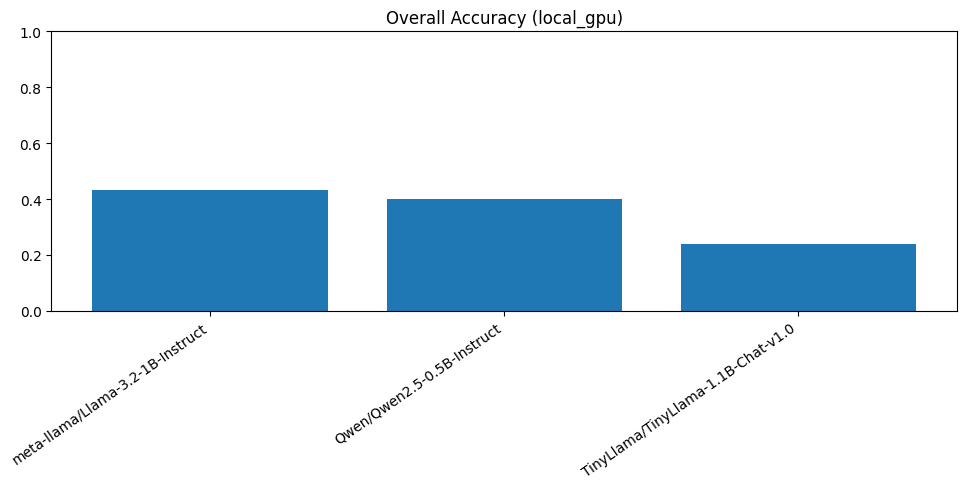


=== Accuracy by Subject (table) ===
Model                     Qwen/Qwen2.5-0.5B-Instruct  TinyLlama/TinyLlama-1.1B-Chat-v1.0  meta-llama/Llama-3.2-1B-Instruct
Subject                                                                                                                   
abstract_algebra                               0.290                               0.150                             0.240
anatomy                                        0.437                               0.237                             0.481
astronomy                                      0.434                               0.224                             0.500
business_ethics                                0.510                               0.220                             0.450
clinical_knowledge                             0.464                               0.283                             0.543
college_biology                                0.431                               0.201              

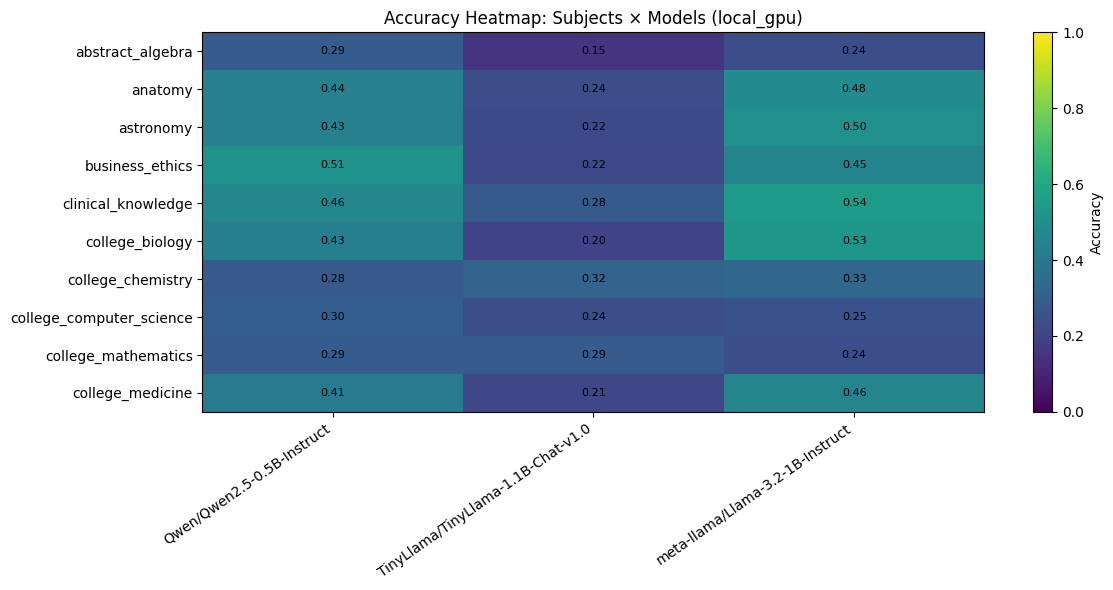

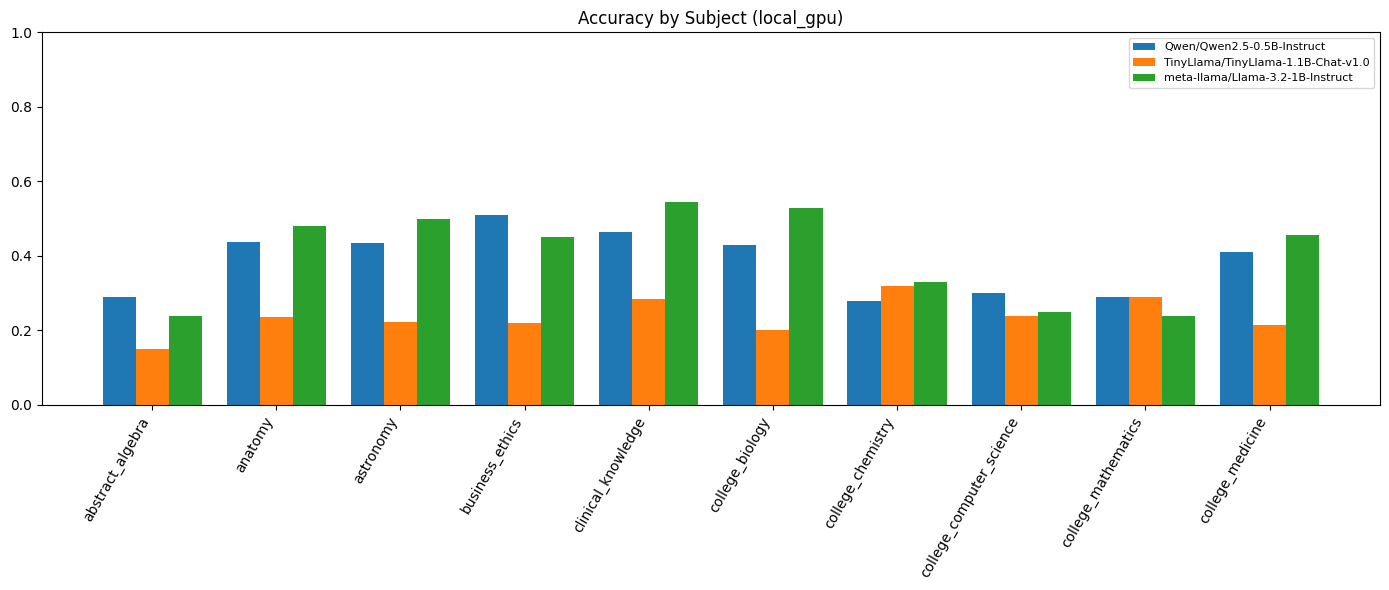


=== Answer Agreement Matrix: abstract_algebra ===
                                    meta-llama/Llama-3.2-1B-Instruct  TinyLlama/TinyLlama-1.1B-Chat-v1.0  Qwen/Qwen2.5-0.5B-Instruct
meta-llama/Llama-3.2-1B-Instruct                                1.00                                0.46                        0.13
TinyLlama/TinyLlama-1.1B-Chat-v1.0                              0.46                                1.00                        0.32
Qwen/Qwen2.5-0.5B-Instruct                                      0.13                                0.32                        1.00


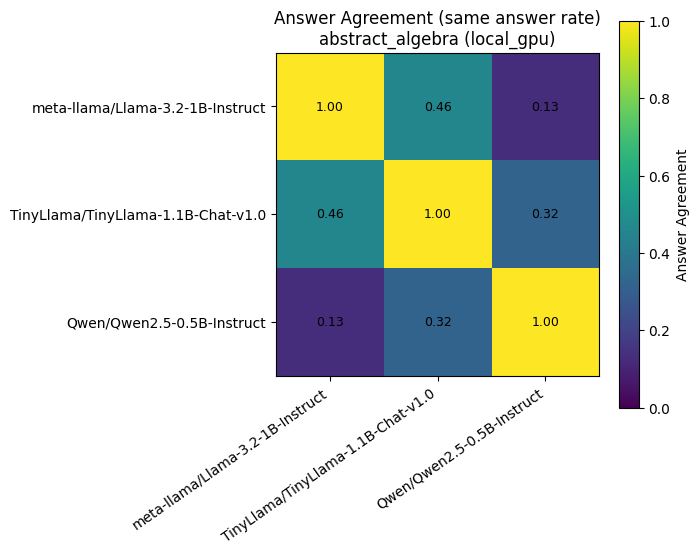


=== Answer Agreement Matrix: anatomy ===
                                    meta-llama/Llama-3.2-1B-Instruct  TinyLlama/TinyLlama-1.1B-Chat-v1.0  Qwen/Qwen2.5-0.5B-Instruct
meta-llama/Llama-3.2-1B-Instruct                               1.000                               0.319                       0.548
TinyLlama/TinyLlama-1.1B-Chat-v1.0                             0.319                               1.000                       0.356
Qwen/Qwen2.5-0.5B-Instruct                                     0.548                               0.356                       1.000


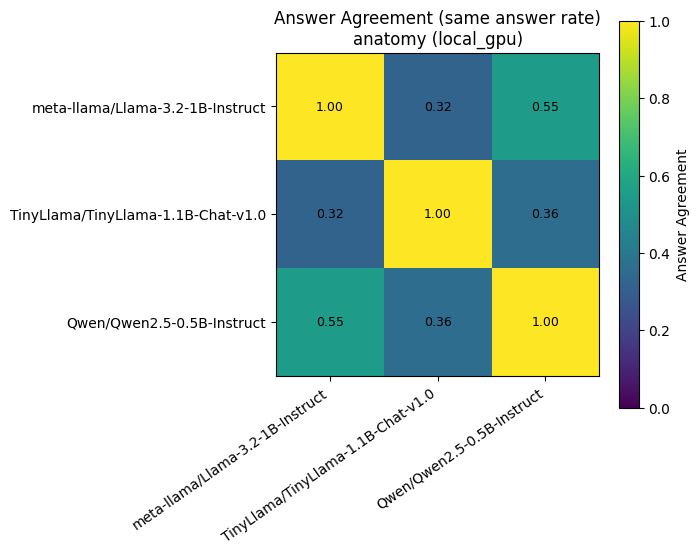


=== Answer Agreement Matrix: astronomy ===
                                    meta-llama/Llama-3.2-1B-Instruct  TinyLlama/TinyLlama-1.1B-Chat-v1.0  Qwen/Qwen2.5-0.5B-Instruct
meta-llama/Llama-3.2-1B-Instruct                               1.000                               0.224                       0.467
TinyLlama/TinyLlama-1.1B-Chat-v1.0                             0.224                               1.000                       0.303
Qwen/Qwen2.5-0.5B-Instruct                                     0.467                               0.303                       1.000


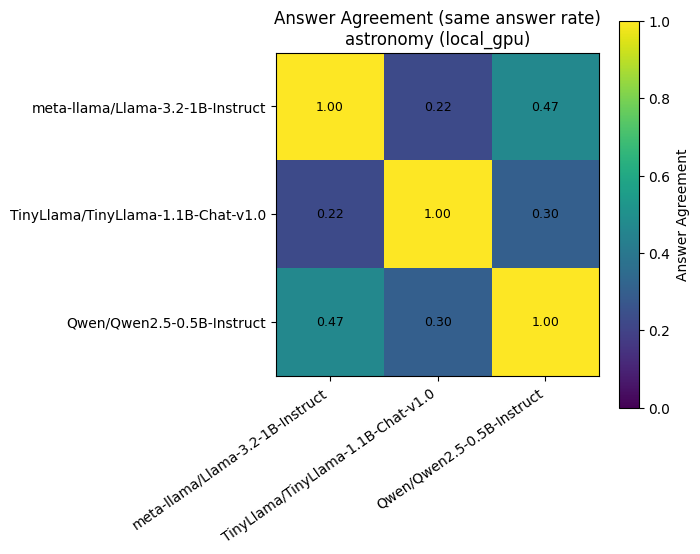


=== Answer Agreement Matrix: business_ethics ===
                                    meta-llama/Llama-3.2-1B-Instruct  TinyLlama/TinyLlama-1.1B-Chat-v1.0  Qwen/Qwen2.5-0.5B-Instruct
meta-llama/Llama-3.2-1B-Instruct                                1.00                                0.31                        0.50
TinyLlama/TinyLlama-1.1B-Chat-v1.0                              0.31                                1.00                        0.25
Qwen/Qwen2.5-0.5B-Instruct                                      0.50                                0.25                        1.00


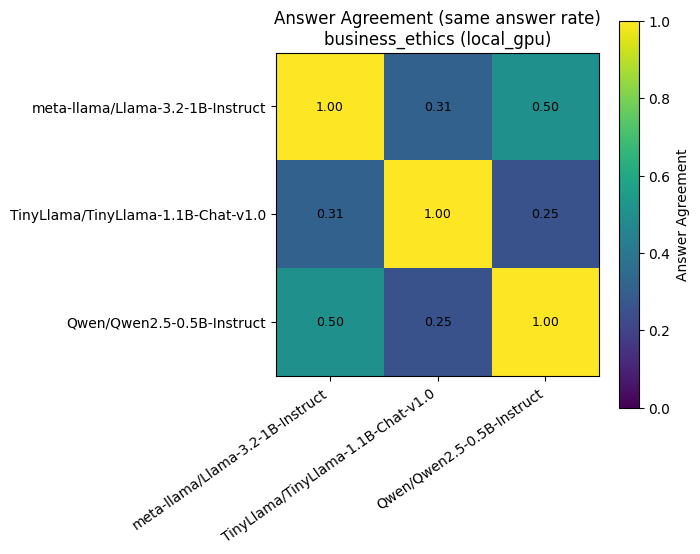


=== Answer Agreement Matrix: clinical_knowledge ===
                                    meta-llama/Llama-3.2-1B-Instruct  TinyLlama/TinyLlama-1.1B-Chat-v1.0  Qwen/Qwen2.5-0.5B-Instruct
meta-llama/Llama-3.2-1B-Instruct                               1.000                               0.302                       0.517
TinyLlama/TinyLlama-1.1B-Chat-v1.0                             0.302                               1.000                       0.366
Qwen/Qwen2.5-0.5B-Instruct                                     0.517                               0.366                       1.000


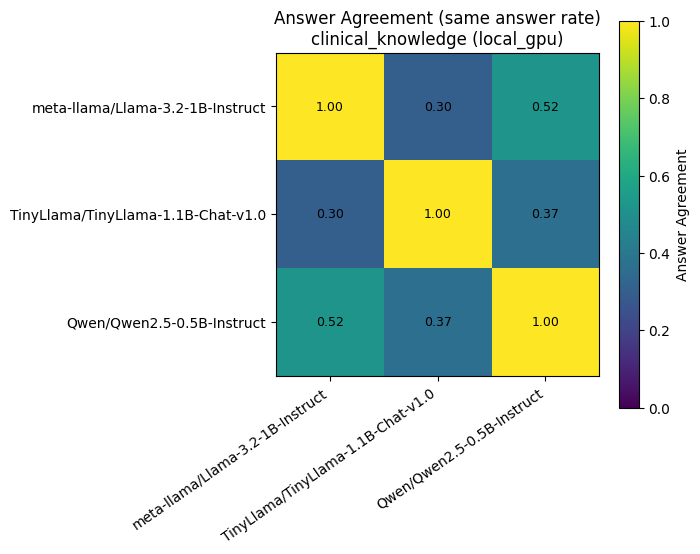


=== Answer Agreement Matrix: college_biology ===
                                    meta-llama/Llama-3.2-1B-Instruct  TinyLlama/TinyLlama-1.1B-Chat-v1.0  Qwen/Qwen2.5-0.5B-Instruct
meta-llama/Llama-3.2-1B-Instruct                               1.000                               0.299                       0.507
TinyLlama/TinyLlama-1.1B-Chat-v1.0                             0.299                               1.000                       0.326
Qwen/Qwen2.5-0.5B-Instruct                                     0.507                               0.326                       1.000


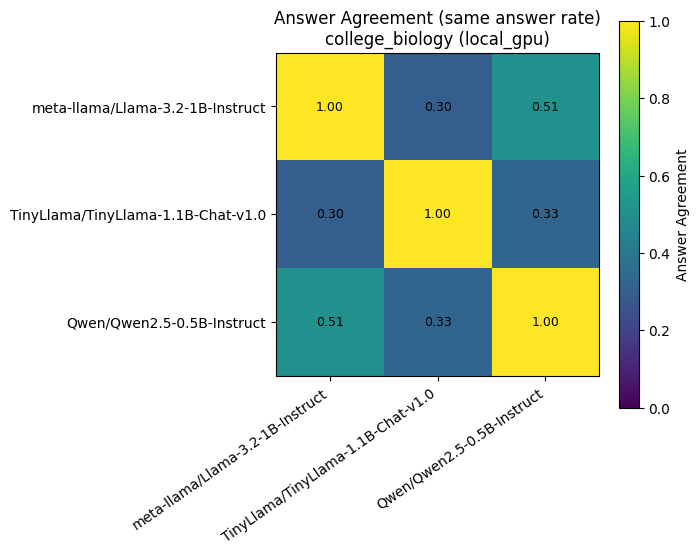


=== Answer Agreement Matrix: college_chemistry ===
                                    meta-llama/Llama-3.2-1B-Instruct  TinyLlama/TinyLlama-1.1B-Chat-v1.0  Qwen/Qwen2.5-0.5B-Instruct
meta-llama/Llama-3.2-1B-Instruct                                1.00                                0.36                        0.41
TinyLlama/TinyLlama-1.1B-Chat-v1.0                              0.36                                1.00                        0.40
Qwen/Qwen2.5-0.5B-Instruct                                      0.41                                0.40                        1.00


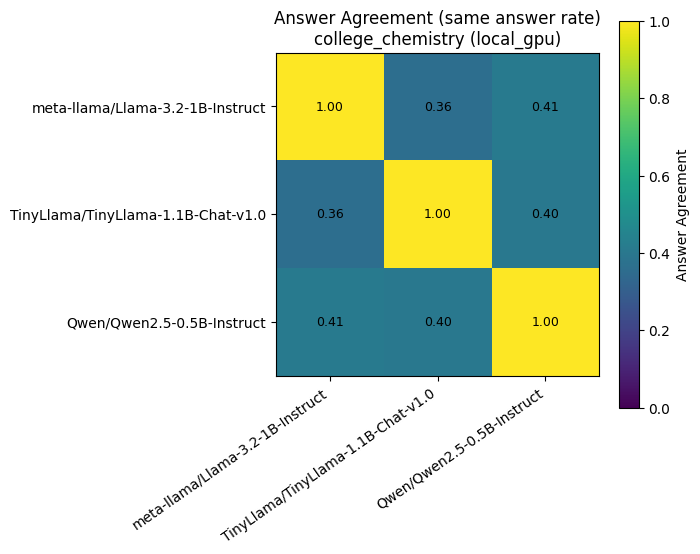


=== Answer Agreement Matrix: college_computer_science ===
                                    meta-llama/Llama-3.2-1B-Instruct  TinyLlama/TinyLlama-1.1B-Chat-v1.0  Qwen/Qwen2.5-0.5B-Instruct
meta-llama/Llama-3.2-1B-Instruct                                1.00                                0.35                        0.46
TinyLlama/TinyLlama-1.1B-Chat-v1.0                              0.35                                1.00                        0.40
Qwen/Qwen2.5-0.5B-Instruct                                      0.46                                0.40                        1.00


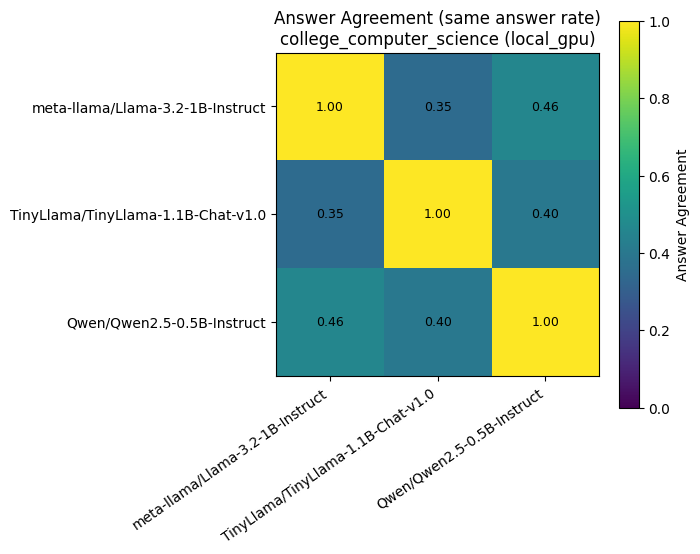


=== Answer Agreement Matrix: college_mathematics ===
                                    meta-llama/Llama-3.2-1B-Instruct  TinyLlama/TinyLlama-1.1B-Chat-v1.0  Qwen/Qwen2.5-0.5B-Instruct
meta-llama/Llama-3.2-1B-Instruct                                1.00                                0.17                        0.23
TinyLlama/TinyLlama-1.1B-Chat-v1.0                              0.17                                1.00                        0.24
Qwen/Qwen2.5-0.5B-Instruct                                      0.23                                0.24                        1.00


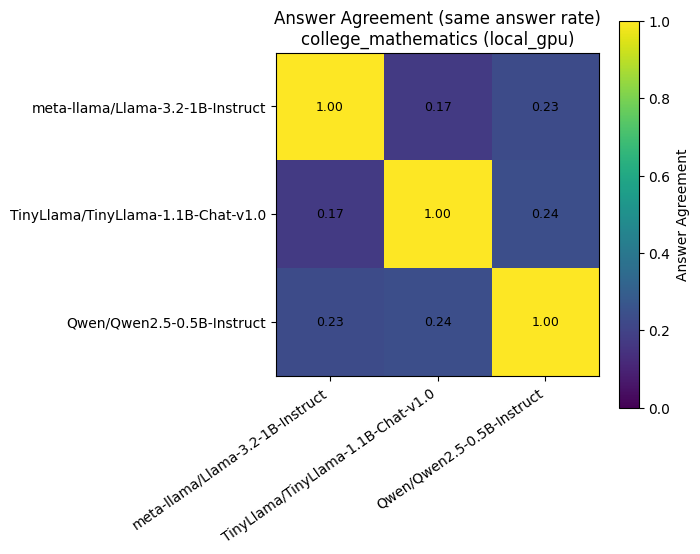


=== Answer Agreement Matrix: college_medicine ===
                                    meta-llama/Llama-3.2-1B-Instruct  TinyLlama/TinyLlama-1.1B-Chat-v1.0  Qwen/Qwen2.5-0.5B-Instruct
meta-llama/Llama-3.2-1B-Instruct                               1.000                               0.272                       0.422
TinyLlama/TinyLlama-1.1B-Chat-v1.0                             0.272                               1.000                       0.393
Qwen/Qwen2.5-0.5B-Instruct                                     0.422                               0.393                       1.000


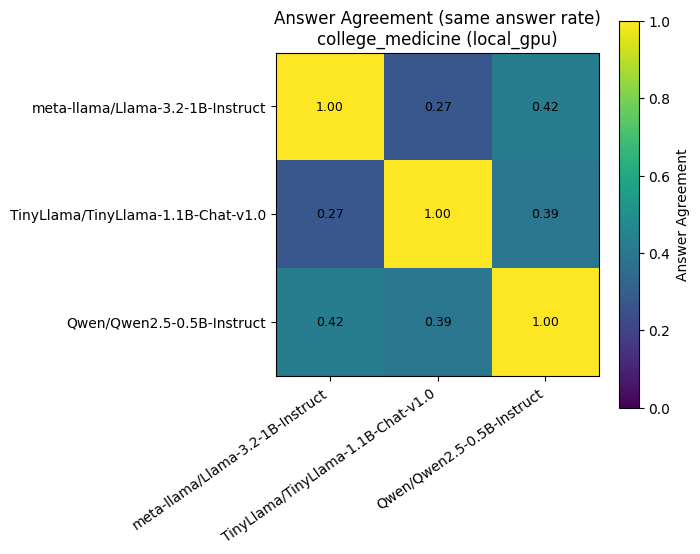


=== Wrong-Question Jaccard (Overall) ===
                                    meta-llama/Llama-3.2-1B-Instruct  TinyLlama/TinyLlama-1.1B-Chat-v1.0  Qwen/Qwen2.5-0.5B-Instruct
meta-llama/Llama-3.2-1B-Instruct                               1.000                               0.509                       0.536
TinyLlama/TinyLlama-1.1B-Chat-v1.0                             0.509                               1.000                       0.544
Qwen/Qwen2.5-0.5B-Instruct                                     0.536                               0.544                       1.000


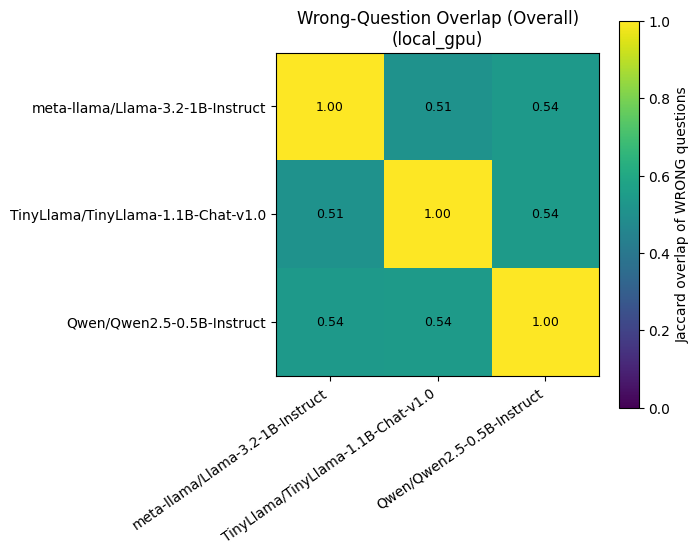

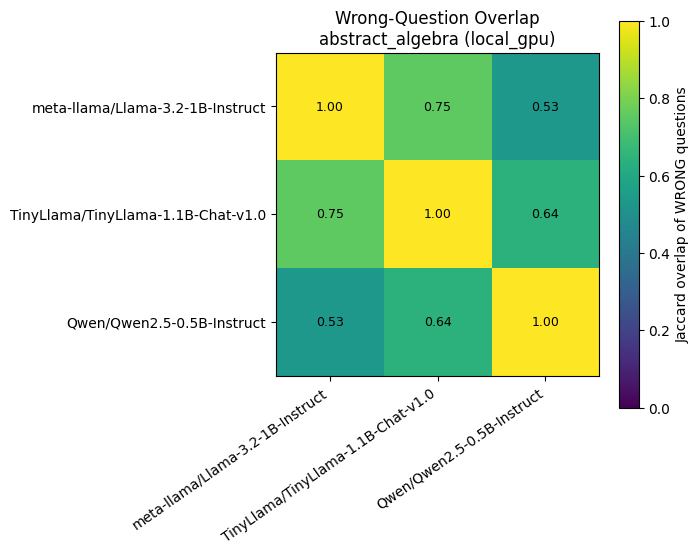

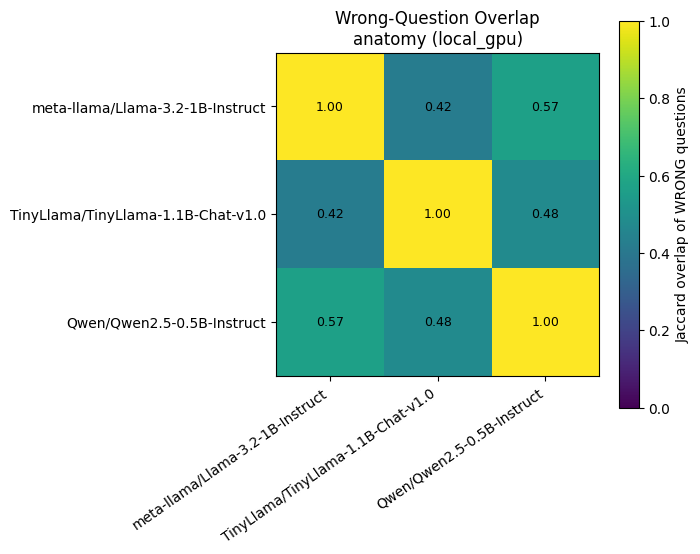

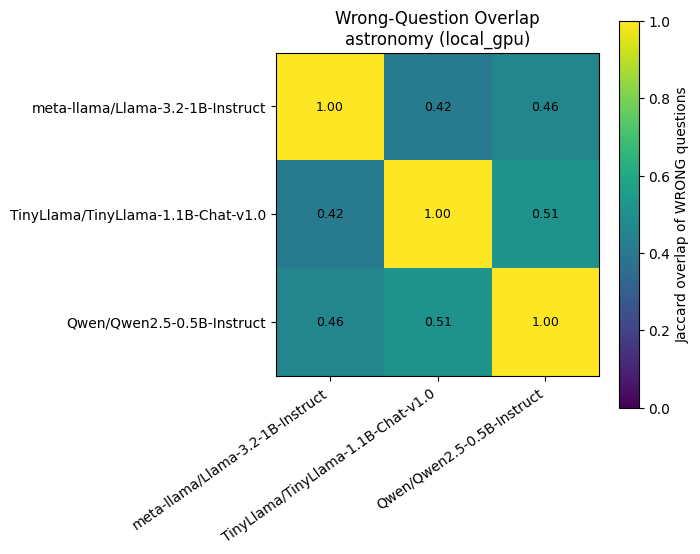

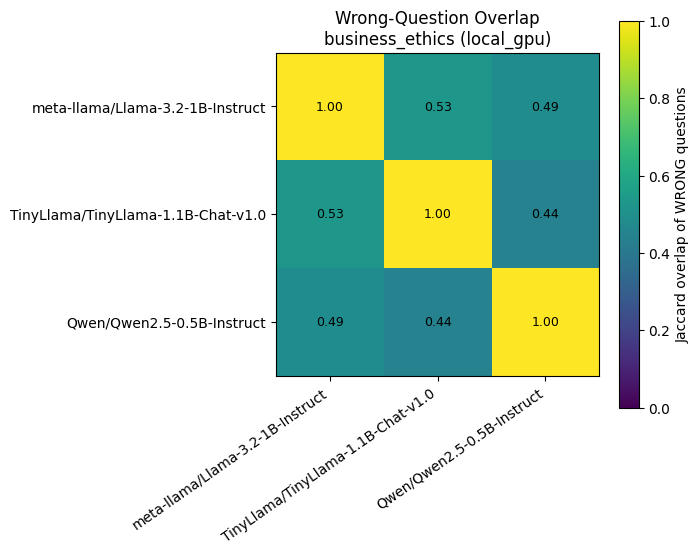

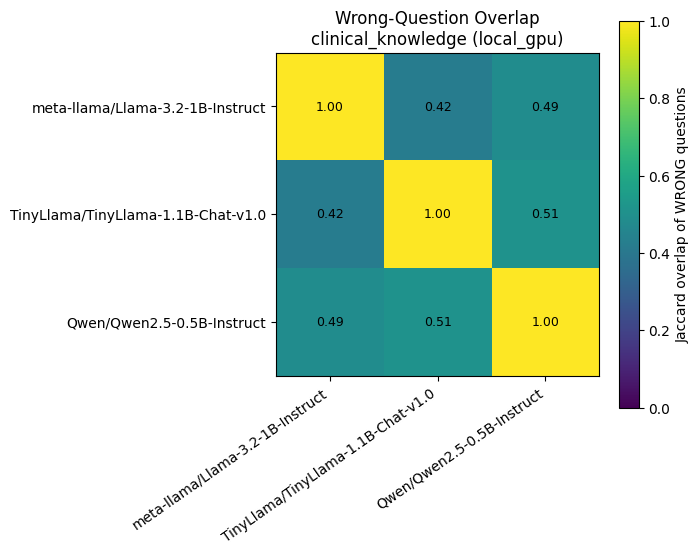

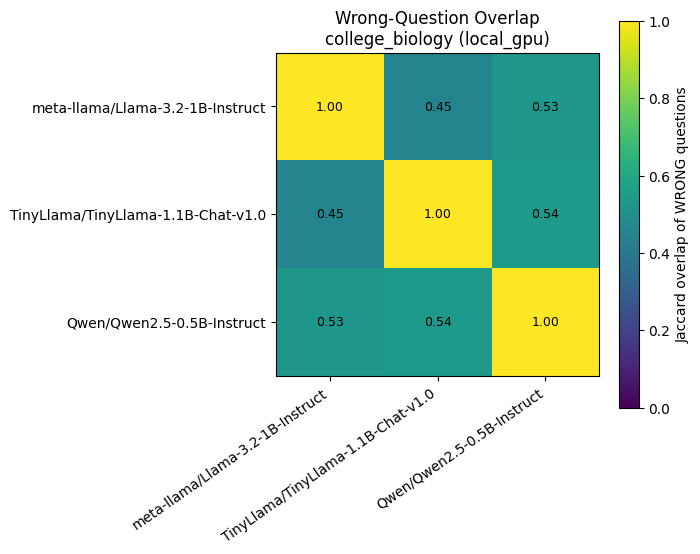

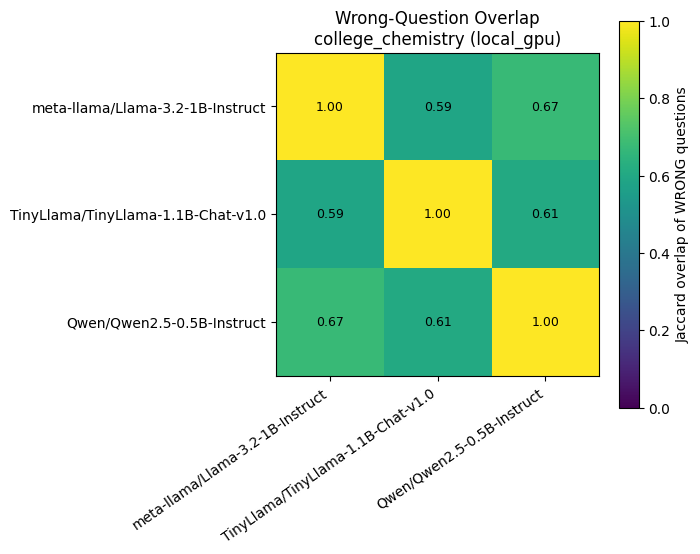

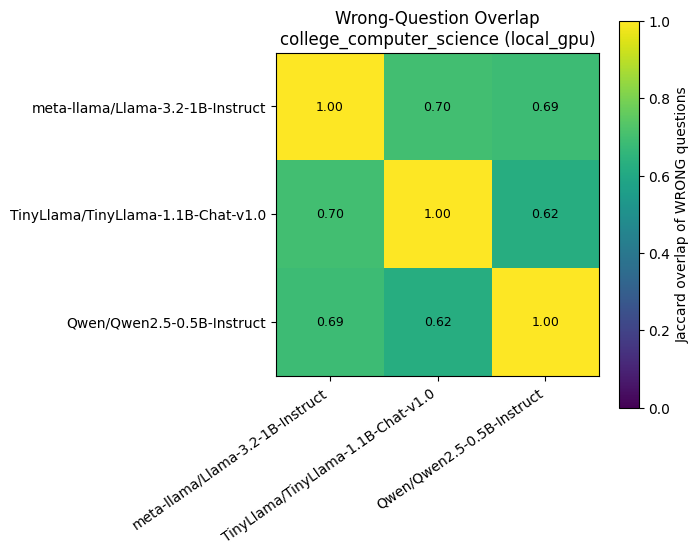

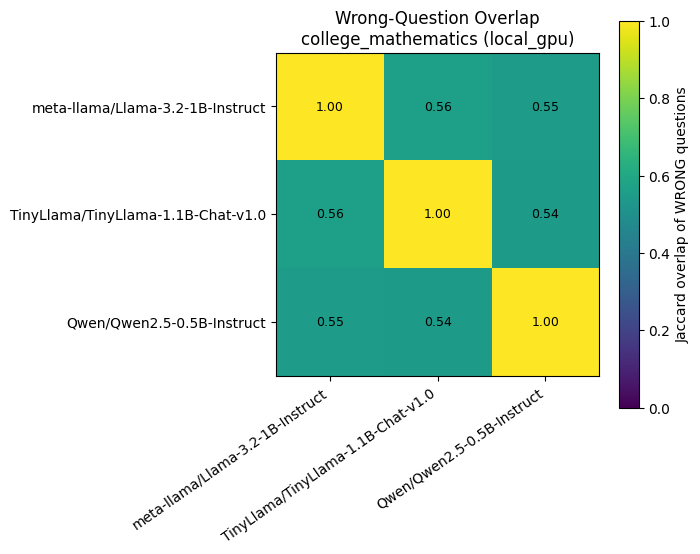

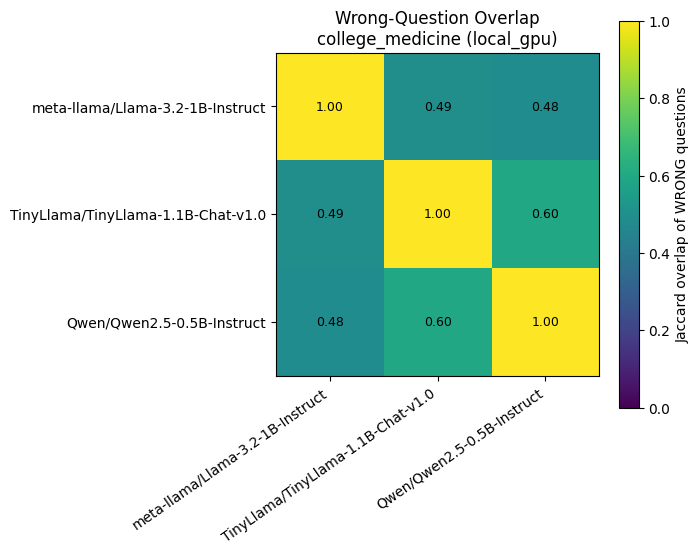


=== Correctness Confusion (Overall): meta-llama/Llama-3.2-1B-Instruct vs TinyLlama/TinyLlama-1.1B-Chat-v1.0 ===
         B wrong  B right
A wrong      613      165
A right      427      164


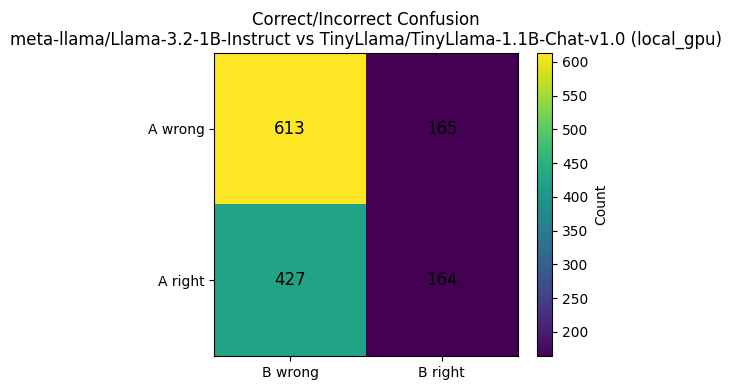


=== Correctness Confusion (Overall): meta-llama/Llama-3.2-1B-Instruct vs Qwen/Qwen2.5-0.5B-Instruct ===
         B wrong  B right
A wrong      558      220
A right      263      328


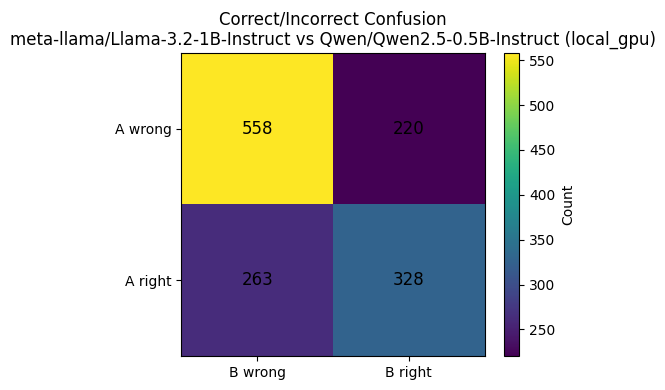


=== Correctness Confusion (Overall): TinyLlama/TinyLlama-1.1B-Chat-v1.0 vs Qwen/Qwen2.5-0.5B-Instruct ===
         B wrong  B right
A wrong      656      384
A right      165      164


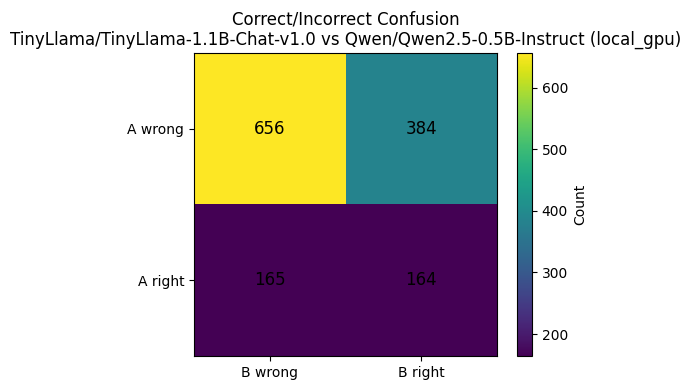


✅ Saved plots + tables to: /Users/shainakumar/cs6501workshop-1/Running_an_LLM/figures/local


In [10]:
make_plots_multimodel(
    json_path="multi_model_mmlu_results_full_20260225_013843.json",
    figures_dir="figures/local",
    run_name="local_gpu"
)

In [ ]:
!git add .
!git commit -m"local analysis" 
!git push 